## SPECKLE

Understanding how it works.

In [1]:
from specklepy.api.client import SpeckleClient
from specklepy.api.credentials import get_default_account

# initialise the client
client = SpeckleClient(host="https://speckle.xyz") # or whatever your host is
# client = SpeckleClient(host="localhost:3000", use_ssl=False) or use local server

# authenticate the client with a token
# account = get_default_account()
# client.authenticate_with_token("8349dc1b415baafb37d91c244867dc5c5a6f0412d8") # python token
client.authenticate_with_token("0ca1b861abd574e214446e26335e8772f1a4c09ad4") # python2 token

# if you're in an environment without accounts, you can construct an Account object yourself
# or authenticate with just a token
# client.authenticate_with_token("YOUR_TOKEN")

In [2]:
from specklepy.api.credentials import get_local_accounts
all_accounts = get_local_accounts() # get back a list
all_accounts

[Account(email: orzan.daniel@yahoo.it, server: https://speckle.xyz, isDefault: True)]

In [3]:
# get a list of your most recent streams
stream_list = client.stream.list()
stream_list

[Stream( id: c4a1a7c48b, name: OUH - Rooms, description: Rooms Management, isPublic: True)]

In [4]:
from specklepy.objects import Base
from specklepy.objects.geometry import Point

class Block(Base):
    length: float
    width: float
    height: float
    origin: Point = None

    def __init__(self, length=1.0, width=1.0, height=1.0, origin=Point(), **kwargs) -> None:
        super().__init__(**kwargs)
        # mark the origin as a detachable attribute
        self.add_detachable_attrs({"origin"})

        self.length = length
        self.width = width
        self.height = height
        self.origin = origin

In [5]:
from specklepy.api.wrapper import StreamWrapper
from specklepy.api.client import SpeckleClient
from specklepy.api import operations

# provide any stream, branch, commit, object, or globals url
wrapper = StreamWrapper("https://speckle.xyz/streams/c4a1a7c48b/commits/50385f68d2")

# get an authenticated SpeckleClient if you have a local account for the server
client = wrapper.get_client()

# get an authenticated ServerTransport if you have a local account for the server
transport = wrapper.get_transport()

# get speckle commit
commit = client.commit.get(wrapper.stream_id, wrapper.commit_id)
commit


Commit( id: 50385f68d2, message: Sent 2106 objects from Revit2019., referencedObject: d7d5628494191e25401e6956fc4076f2, authorName: Luca Ofria, branchName: k01/dp04_est_n001, createdAt: 2022-10-28 16:38:50.977000+00:00 )

In [6]:
# need the referencedObject to access data inside of commit
obj_id = commit.referencedObject

# receive objects from commits
commit_data = operations.receive(obj_id, transport)

In [7]:
rooms = commit_data["@Rooms"]
rooms

[Base(id: d03d5755caaaf9e600724fc5f976fe36, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: 5a846be7d38f7afe091e11f93c102c99, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: ae49cb8b55a624855d611cbd3e465fd0, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: 455485dc3aaf553b5163d6c36fa4dbcd, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: 09da1c418a9d2cef95d1f221d06367e2, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: b07a38f833088c3dcf190643b7ec6b9c, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: 3778bbc802373d1cb3af2f133b16d382, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: abb33aa2f1196c19ca60a357ca3f40e2, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: cc5f27cbec98441cf82435210d5f18b7, speckle_type: Objects.BuiltElements.Room, totalChildrenCount: 0),
 Base(id: 

In [8]:
categories = commit_data.get_dynamic_member_names()
categories

['@Rooms']

In [15]:
# access parameters inside rooms
parameters = commit_data["@Rooms"][0]["parameters"].get_dynamic_member_names()
parameters

['64bcc7dc-064e-45f5-90b0-5b65ad75a9bf',
 'ROOM_DESIGN_LIGHTING_LOAD_PER_AREA_PARAM',
 'b9178264-3cbc-4b03-91ea-5e8dc24884de',
 'dd073d8c-3ffe-425b-9fcb-c16ee44a45c2',
 '6bc83a34-e6bc-4e44-b283-896d23d37716',
 '962d7d2d-9517-45e7-8a2f-92f93aaa0ed5',
 '8a26f27d-cca6-4d84-b75a-c70fe797af9c',
 '29b7c39d-57ce-407b-a3e0-6db800fe0ab2',
 'ROOM_CALCULATED_SUPPLY_AIRFLOW_PER_AREA_PARAM',
 'OHPT_RelevantAreaRooms',
 '23516c81-5895-4655-860f-69acba9ff534',
 '2fd71ad9-77a8-4344-8f3f-aabc3af5a679',
 '9c3e2bec-3091-465f-9506-6d37cb409aeb',
 '78586cfe-cd05-461f-918e-2e109d826e8d',
 '49c53100-4317-49ea-a814-3f1311e695b8',
 '873cb81b-e9dc-4361-b4c1-d59ebcbd2350',
 '8af651c6-0060-4cae-97f2-a4f24422f447',
 'bf513a74-9a31-48dd-8a56-14dc446c8834',
 '065e5d9c-0e5a-41de-9617-e9623dc4204d',
 '114d2e71-a17b-4dad-be7c-2b29d254c128',
 '0faa4ab9-2397-4f96-b1d8-dd4e41447763',
 '3f0e8184-c98a-47db-9cd2-419198283254',
 'd08c6f7e-1cc3-40f8-aaa2-79b682b49039',
 'ROOM_VOLUME',
 'bb515ff7-bc8a-4b3f-ac65-40b2426d5d9e',
 

In [10]:
commit_data["@Rooms"][0]["parameters"]["ROOM_ACTUAL_LIGHTING_LOAD_PER_AREA_PARAM"]["name"]

'Actual Lighting Load per area'

## DATA

Starting to get coordinates of rooms.

In [5]:
from specklepy.api.wrapper import StreamWrapper
from specklepy.api.client import SpeckleClient
from specklepy.api import operations

def get_coords(stream_link):
    wrapper = StreamWrapper(stream_link)
    client = wrapper.get_client()
    transport = wrapper.get_transport()
    commit = client.commit.get(wrapper.stream_id, wrapper.commit_id)
    obj_id = commit.referencedObject
    commit_data = operations.receive(obj_id, transport)

    rooms = commit_data["@Rooms"]
    coords = []
    empty_rooms = []
    room_coords = {}
    rooms = commit_data["@Rooms"]
    idx = 0
    for room in rooms:
        outline = room["outline"]
        if outline:
            segments = len(outline["segments"])
            for i in range(segments):
                x_start = room["outline"]["segments"][i]["start"]["x"]
                y_start = room["outline"]["segments"][i]["start"]["y"]
                x_end = room["outline"]["segments"][i]["end"]["x"]
                y_end = room["outline"]["segments"][i]["end"]["y"]
                coords.append(((x_start,y_start),(x_end,y_end)))
            room_coords[idx] = coords
            idx += 1
            coords = []
            i = 0
        else:
            empty_rooms.append(idx)
            idx += 1

    return room_coords, empty_rooms

In [1]:
from specklepy.api.wrapper import StreamWrapper
from specklepy.api.client import SpeckleClient
from specklepy.api import operations

def get_coords_doors(stream_link):
    wrapper = StreamWrapper(stream_link)
    client = wrapper.get_client()
    transport = wrapper.get_transport()
    commit = client.commit.get(wrapper.stream_id, wrapper.commit_id)
    obj_id = commit.referencedObject
    commit_data = operations.receive(obj_id, transport)

    doors = commit_data["@Doors"]
    empty_doors = []
    door_coords = {}
    doors = commit_data["@Doors"]
    idx = 0
    for door in doors:
        basePoint = door["basePoint"]
        if basePoint:
            x = basePoint["x"]
            y = basePoint["y"]
            door_coords[idx] = (x,y)
            idx += 1
        else:
            empty_doors.append(idx)
            idx += 1

    return door_coords, empty_doors

In [3]:
stream_link = "https://speckle.xyz/streams/c4a1a7c48b/commits/5072d65f3c"

In [6]:
room_coords, empty_rooms = get_coords(stream_link)

In [12]:
room_coords[153]

[((-497250.0000619971, -1560471.990402114),
  (-497250.0000619971, -1556145.0000032745)),
 ((-497250.0000619971, -1556145.0000032745),
  (-492375.5097827462, -1556145.0000032745)),
 ((-492222.5001827462, -1556007.2304032745),
  (-492222.5001827462, -1553914.0000026827)),
 ((-492222.5001827462, -1553914.0000026827),
  (-492647.4469372051, -1553914.0000026827)),
 ((-492647.4469372051, -1553914.0000026827),
  (-492647.5000619971, -1553914.0000026827)),
 ((-492647.5000619971, -1553901.5000026827),
  (-492709.042209441, -1553901.5000026827)),
 ((-492709.042209441, -1553901.5000026827),
  (-496236.0000574435, -1553901.5000026827)),
 ((-496236.0000574435, -1553914.0000026827),
  (-496297.59532967943, -1553914.0000026827)),
 ((-496297.59532967943, -1553914.0000026827),
  (-497190.0000619973, -1553914.0000026827)),
 ((-497190.0000619973, -1553914.0000026827),
  (-497190.0000619973, -1553503.5096026831)),
 ((-497190.0000619973, -1553503.5096026831),
  (-497190.0000619973, -1553412.5000026827)),


In [78]:
commit_data["@Rooms"][1134]["area"]

29.669555343874347

In [2]:
link_with_data = "https://speckle.xyz/streams/cd5b9659b0/commits/8511f0ad12"
door_coords, empty_doors = get_coords_doors(link_with_data)

In [5]:
door_coords

{0: (-230635.00006209678, -1779615.0000029667),
 1: (-230635.00006209678, -1782185.000002967),
 2: (-230635.0000620968, -1790452.5000029667),
 3: (-230635.0000620968, -1793109.0000029665),
 4: (-230635.0000620968, -1796627.5000029672),
 5: (-230635.0000620968, -1799135.0000029672),
 6: (-230635.00006209683, -1807415.000002967),
 7: (-230635.00006209683, -1810985.000002967),
 8: (-230622.50006209683, -1819265.0000028259),
 9: (-230635.00006209686, -1825415.000002967),
 10: (-230635.00006209686, -1829330.69959088),
 11: (-230635.00006209686, -1832681.0000029658),
 12: (-230635.00006209686, -1836189.0000029672),
 13: (-230635.00006209686, -1839811.000030198),
 14: (-230635.00006209686, -1843319.0000029677),
 15: (-230635.00006209646, -1847081.000002967),
 16: (-230635.00006209692, -1850519.0000029677),
 17: (-230635.00006209692, -1854385.0000029674),
 18: (-219965.00006191808, -1778615.000002967),
 19: (-219965.00006191808, -1782185.0000029672),
 20: (-219965.00006191808, -1784785.0000029

## TRAINING DATA

Retrieving needed data and structuring it to feed the GAN.

In [2]:
from matplotlib import pyplot as plt

def floor_plan(data_dict, level, zoom=2.5):

    walls = data_dict[level][3]
    doors = data_dict[level][2]

    fig = plt.figure()
    
    for line in walls:
        plt.plot([line[0], line[2]], [line[1], line[3]], color='black')
    for line in doors:
        plt.plot([line[0], line[2]], [line[1], line[3]], color='red')

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    w, h = fig.get_size_inches()
    fig.set_size_inches(w * zoom, h * zoom)

In [28]:
from specklepy.api.wrapper import StreamWrapper
from specklepy.api.client import SpeckleClient
from specklepy.api import operations
import numpy as np
from shapely.geometry import Polygon
import json

def to_json(data_dict,adj_rooms): # data_dict[level] = (rms_type,poly,doors,walls)
    for level in data_dict:
        rms_type,poly,_,walls = data_dict[level]
        km=0
        bboxes=[]  
        edges=[]
        ed_rm=[]

        # in get_data add to walls the doors with their type, add also to rms_type and poly all doors
        # then modify last entries of walls exploiting adj_rooms

        # ed_rm contains index of room corresponding to edge and index of adjacent room if any
        # or it contains index of door corresponding to edge and index of adjacent room if any

        for w_i in range(len(walls)):
            edges.append([walls[w_i][0],walls[w_i][1],walls[w_i][2],walls[w_i][3],walls[w_i][5],walls[w_i][8]])
            if(walls[w_i][6]==-1):
                ed_rm.append([walls[w_i][7]])
            elif(walls[w_i][7]==-1):
                ed_rm.append([walls[w_i][6]])
            else:
                ed_rm.append([walls[w_i][6],walls[w_i][7]])
    
        for i in range(len(poly)):
            p=poly[i]
            pm=[]
            for p_i in range((p)):
                pm.append(([edges[km+p_i][0],edges[km+p_i][1]]))
            km=km+p
            polygon = Polygon(pm)
            bbox=np.asarray(polygon.bounds)
            bboxes.append(bbox.tolist())

        info=dict()
        info['room_type'] = rms_type
        info['boxes'] = bboxes # bounding boxes per room  
        info['edges'] = edges # first four entry per list are rooms edges and 5th and 6th are showing what room type is on each side of edge 
        info['ed_rm'] = ed_rm # room indexes that are on each side of the edges
        with open(level+".json","w") as f:
            json.dump(info, f)

    return

def get_data(stream_link):
    rooms, doors = get_commit_data(stream_link)
    # room_dps = get_dp(rooms)
    room_names, legend_names = get_room_type(rooms)
    legend_names['Door'] = len(legend_names) + 1
    legend_names['Outside door'] = len(legend_names) + 1
    room_levels, rooms_nolevel = get_level(rooms)
    door_levels, doors_nolevel = get_level(doors)
    legend_levels = list(room_levels.keys())
    if set(legend_levels) == set(door_levels.keys()):
        print('rooms and doors have the same levels.')
        print('levels:',legend_levels)
    else:
        print('room and door levels are different.')
        print('room levels:',legend_levels)
        print('door levels:',list(door_levels.keys()))
    if stream_link == 'https://speckle.xyz/streams/cd5b9659b0/commits/2fee7a972c':
        room_levels['Plan 5 (05)'] = room_levels['05 Plan 5']
        del room_levels['05 Plan 5']
        legend_levels = list(room_levels.keys())
        print('New room levels:',legend_levels)
    # room_perimeters = get_room_perimeter(rooms)
    room_coords, empty_rooms = get_room_coords(rooms)
    door_coords, empty_doors = get_door_coords(doors,stream_link)
    # exploit rotation of doors?
    new_doors,adj_rooms = create_doors(door_coords,room_coords,legend_levels,room_levels,door_levels,stream_link)
    data_dict = {} # key = level, value = rms_type,poly,doors,walls
    # where rms_type is the list of room types, poly is the number of walls of each room,
    # doors is the coordinates of doors + some fixed values
    for level in legend_levels:
        rms_type = []
        poly = []
        doors = []
        door_id = door_levels[level]
        walls = []
        rooms_id = room_levels[level]
        idx = 0
        for door in door_id:
            if door in new_doors.keys():
                doors.append([new_doors[door][0][0],new_doors[door][0][1],new_doors[door][2][0],new_doors[door][2][1]])
                doors.append([new_doors[door][2][0],new_doors[door][2][1],new_doors[door][3][0],new_doors[door][3][1]])
                doors.append([new_doors[door][3][0],new_doors[door][3][1],new_doors[door][1][0],new_doors[door][1][1]])
                doors.append([new_doors[door][1][0],new_doors[door][1][1],new_doors[door][0][0],new_doors[door][0][1]])
        for room in rooms_id:
            if room in room_coords.keys():
                rms_type.append(legend_names[room_names[room]])
                poly.append(len(room_coords[room]))
                for coord in room_coords[room]:
                    walls.append([coord[0][0],coord[0][1],coord[1][0],coord[1][1],-1,legend_names[room_names[room]],idx,-1,0])
                idx +=1
        data_dict[level] = (rms_type,poly,doors,walls)

    # I want it structured as rms_type,poly,doors,walls,out
    # so that then I can apply the to_json function and output a json file
    # then training takes as input the file
    
    return data_dict #,adj_rooms

def create_doors(door_coords,room_coords,legend_levels,room_levels,door_levels,stream_link):
    # door_coords[id] = ((x,y),width), room = ((x_start,y_start),(x_end,y_end))
    new_doors = {}
    adj_rooms = {}
    tmp = 0
    for level in legend_levels:
        door_id = door_levels[level] # list of ids of doors in level
        room_id = room_levels[level] # list of ids of rooms in level
        for d_id in door_id:
            if d_id in door_coords.keys():
                door = door_coords[d_id]
            else:
                continue
            m = None
            count = 0
            for r_id in room_id:
                if r_id in room_coords.keys():
                    room = room_coords[r_id]
                else:
                    continue
                for line in room:
                    x_dx = line[0][0]
                    x_sx = line[1][0]
                    if x_dx < x_sx:
                        x_dx = line[1][0]
                        x_sx = line[0][0]
                    y_dx = line[0][1]
                    y_sx = line[1][1]
                    if y_dx < y_sx:
                        y_dx = line[1][1]
                        y_sx = line[0][1]
                    err = 500
                    if stream_link == 'https://speckle.xyz/streams/cd5b9659b0/commits/97037eb09b':
                        err = 0.2
                    if door[0][0] <= x_dx+err and door[0][0] > x_sx-err: # check if x_door is between x_wall corners
                        if door[0][1] <= y_dx+err and door[0][1] > y_sx-err: # check if y_door is between y_wall corners
                            count += 1
                            if count == 1:
                                tmp_r_id = (r_id,x_dx,y_dx,x_sx,y_sx)
                                new_door, basePoint = add_width(door,line,d_id,stream_link)
                                c = centroid(r_id,room_coords)
                                d1 = np.sqrt((basePoint[0][0]-c[0])**2 + (basePoint[0][1]-c[1])**2)
                                d2 = np.sqrt((basePoint[1][0]-c[0])**2 + (basePoint[1][1]-c[1])**2)
                                if d1 < d2:
                                    adj_rooms[(d_id,new_door[1][0][0],new_door[1][0][1],new_door[1][1][0],new_door[1][1][1])] = r_id
                                else:
                                    adj_rooms[(d_id,new_door[1][2][0],new_door[1][2][1],new_door[1][3][0],new_door[1][3][1])] = r_id
                                m = True
                                new_doors[new_door[0]] = [new_door[1][0],new_door[1][1],new_door[1][2],new_door[1][3]]
                                break
                            else:
                                c = centroid(r_id,room_coords)
                                d1 = np.sqrt((basePoint[0][0]-c[0])**2 + (basePoint[0][1]-c[1])**2)
                                d2 = np.sqrt((basePoint[1][0]-c[0])**2 + (basePoint[1][1]-c[1])**2)
                                if d1 < d2:
                                    adj_rooms[(d_id,new_door[1][0][0],new_door[1][0][1],new_door[1][1][0],new_door[1][1][1])] = r_id
                                else:
                                    adj_rooms[(d_id,new_door[1][2][0],new_door[1][2][1],new_door[1][3][0],new_door[1][3][1])] = r_id
                                if tmp_r_id not in adj_rooms.keys():
                                    adj_rooms[tmp_r_id] = []
                                adj_rooms[tmp_r_id].append(r_id)
                                if (r_id,x_dx,y_dx,x_sx,y_sx) not in adj_rooms.keys():
                                    adj_rooms[(r_id,x_dx,y_dx,x_sx,y_sx)] = []
                                adj_rooms[(r_id,x_dx,y_dx,x_sx,y_sx)].append(tmp_r_id[0])
                if m is not None:
                    if count == 2:
                        break
                    else:
                        continue
            if m is None: # did not find a room for the door
                tmp += 1
                # new_door, m = add_width(door,((0,0),(0,0)),n_d)
                # new_doors[new_door[0]] = [new_door[1],new_door[2]]

    if tmp:
        print('There are',tmp,'doors without a room.')
    return new_doors, adj_rooms

def centroid(r_id,room_coords):
    count = 0
    xy = [0,0]
    for coord in room_coords[r_id]:
        count += 1
        xy[0] += coord[0][0]
        xy[1] += coord[0][1]
    return (xy[0]/count,xy[1]/count)

def add_width(door,room_coord,id,stream_link):
    w = door[1]
    if stream_link == 'https://speckle.xyz/streams/cd5b9659b0/commits/97037eb09b':
        w2 = 0.5/20
    else:
        w2 = 50
    x = door[0][0]
    y = door[0][1]
    if room_coord[1][0]-room_coord[0][0]: # not line of type x = k
        m = (room_coord[1][1]-room_coord[0][1])/(room_coord[1][0]-room_coord[0][0])
        if m:
            m1 = -1/m
            if m > 0:
                x_start = x - w/(2*np.sqrt(m*m+1))
                x_end = x + w/(2*np.sqrt(m*m+1))
                y_start = y - m*w/(2*np.sqrt(m*m+1))
                y_end = y + m*w/(2*np.sqrt(m*m+1))
                xb1 = x - w2/(2*np.sqrt(m1*m1+1))
                yb1 = y + w2/(2*np.sqrt(m1*m1+1))
                xb2 = x + w2/(2*np.sqrt(m1*m1+1))
                yb2 = y - w2/(2*np.sqrt(m1*m1+1))
                x_start1 = x_start - w2/(2*np.sqrt(m1*m1+1))
                y_start1 = y_start + w2/(2*np.sqrt(m1*m1+1))
                x_start2 = x_start + w2/(2*np.sqrt(m1*m1+1))
                y_start2 = y_start - w2/(2*np.sqrt(m1*m1+1))
                x_end1 = x_end - w2/(2*np.sqrt(m1*m1+1))
                y_end1 = y_end + w2/(2*np.sqrt(m1*m1+1))
                x_end2 = x_end + w2/(2*np.sqrt(m1*m1+1))
                y_end2 = y_end - w2/(2*np.sqrt(m1*m1+1))
            else:
                x_start = x - w/(2*np.sqrt(m*m+1))
                x_end = x + w/(2*np.sqrt(m*m+1))
                y_start = y + m*w/(2*np.sqrt(m*m+1))
                y_end = y - m*w/(2*np.sqrt(m*m+1))
                xb1 = x - w2/(2*np.sqrt(m1*m1+1))
                yb1 = y - w2/(2*np.sqrt(m1*m1+1))
                xb2 = x + w2/(2*np.sqrt(m1*m1+1))
                yb2 = y + w2/(2*np.sqrt(m1*m1+1))
                x_start1 = x_start - w2/(2*np.sqrt(m1*m1+1))
                y_start1 = y_start - w2/(2*np.sqrt(m1*m1+1))
                x_start2 = x_start + w2/(2*np.sqrt(m1*m1+1))
                y_start2 = y_start + w2/(2*np.sqrt(m1*m1+1))
                x_end1 = x_end - w2/(2*np.sqrt(m1*m1+1))
                y_end1 = y_end - w2/(2*np.sqrt(m1*m1+1))
                x_end2 = x_end + w2/(2*np.sqrt(m1*m1+1))
                y_end2 = y_end + w2/(2*np.sqrt(m1*m1+1))
        else:
            x_start = x - w/2
            x_end = x + w/2
            y_start = y
            y_end = y
            xb1 = x
            yb1 = y + w2/2
            xb2 = x
            yb2 = y - w2/2
            x_start1 = x_start
            y_start1 = y_start - w2/2
            x_start2 = x_start
            y_start2 = y_start + w2/2
            x_end1 = x_end
            y_end1 = y_end - w2/2
            x_end2 = x_end
            y_end2 = y_end + w2/2
    else:
        x_start = x
        x_end = x
        y_start = y - w/2
        y_end = y + w/2
        xb1 = x + w2/2
        yb1 = y
        xb2 = x - w2/2
        yb2 = y
        x_start1 = x_start - w2/2
        y_start1 = y_start
        x_start2 = x_start + w2/2
        y_start2 = y_start
        x_end1 = x_end - w2/2
        y_end1 = y_end
        x_end2 = x_end + w2/2
        y_end2 = y_end

    return [id,[(x_start1,y_start1),(x_end1,y_end1),(x_start2,y_start2),(x_end2,y_end2)]], [(xb1,yb1),(xb2,yb2)]

def get_commit_data(stream_link):
    wrapper = StreamWrapper(stream_link)
    client = wrapper.get_client()
    transport = wrapper.get_transport()
    commit = client.commit.get(wrapper.stream_id, wrapper.commit_id)
    obj_id = commit.referencedObject
    commit_data = operations.receive(obj_id, transport)
    if stream_link == 'https://speckle.xyz/streams/cd5b9659b0/commits/97037eb09b':
        rooms = commit_data["@Spaces"]
    else:
        rooms = commit_data["@Rooms"]
    doors = commit_data["@Doors"]
    return rooms, doors

def get_dp(rooms):
    room_dps = {}
    idx = 0
    for room in rooms:
        room_dps[idx] = room["number"]
        idx += 1
    return room_dps

def get_room_type(rooms):
    room_names = {}
    legend_names = {}
    i = 0        
    for room in rooms:
        name = room["name"]
        if name not in legend_names.keys():
            i += 1
            legend_names[name] = i
        room_names[room["id"]] = name
    return room_names, legend_names

def get_level(elms):
    levels = {}
    without_level = []
    for elm in elms:
        if "level" in elm.get_dynamic_member_names():
            if elm["level"] is not None:
                if elm["level"]["name"] not in levels.keys():
                    levels[elm["level"]["name"]] = []
                levels[elm["level"]["name"]].append(elm["id"])
        else:
            without_level.append(elm["id"])
    return levels, without_level

def get_room_perimeter(rooms):
    room_perimeters = {}
    idx = 0
    for room in rooms:
        room_perimeters[idx] = room["parameters"]["ROOM_PERIMETER"]["value"]
        idx += 1
    return room_perimeters

def get_room_coords(rooms):
    coords = []
    empty_rooms = []
    room_coords = {}
    for room in rooms:
        outline = room["outline"]
        if outline:
            segments = len(outline["segments"])
            for i in range(segments):
                try:
                    x_start = room["outline"]["segments"][i]["start"]["x"]
                    y_start = room["outline"]["segments"][i]["start"]["y"]
                    x_end = room["outline"]["segments"][i]["end"]["x"]
                    y_end = room["outline"]["segments"][i]["end"]["y"]
                except:
                    empty_rooms.append(room["id"])
                    continue
                coords.append(((x_start,y_start),(x_end,y_end)))
            room_coords[room["id"]] = coords
            coords = []
            i = 0
        else:
            empty_rooms.append(room["id"])
    
    if empty_rooms:
        print('There are', len(empty_rooms), 'rooms without outline.')

    return room_coords, empty_rooms

def get_door_coords(doors,stream_link):
    empty_doors = []
    door_coords = {}
    for door in doors:
        if "Panel Width" in door["parameters"].get_dynamic_member_names():
            width = door["parameters"]["Panel Width"]["value"]
        elif "ClearOpening" in door["parameters"].get_dynamic_member_names():
            width = door["parameters"]["ClearOpening"]["value"]
        elif "Width" in door["parameters"].get_dynamic_member_names():
            width = door["parameters"]["Width"]["value"]
        else:
            if stream_link == 'https://speckle.xyz/streams/cd5b9659b0/commits/97037eb09b':
                width = 0.5
            else:
                width = 915
        if width > 1500:
            width = 915
        
        if "basePoint" in door.get_dynamic_member_names():
            basePoint = door["basePoint"]
            try:
                x = basePoint["x"]
                y = basePoint["y"]
            except:
                empty_doors.append(door["id"])
            door_coords[door["id"]] = ((x,y),width)
        else:
            empty_doors.append(door["id"])
    
    if empty_doors:
        print('There are', len(empty_doors), 'doors without basePoint.')

    return door_coords, empty_doors

In [20]:
stream_link = 'https://speckle.xyz/streams/cd5b9659b0/commits/68b39dcd6d'
data_dict2 = get_data(stream_link)

rooms and doors have the same levels.
levels: ['Kælderplan (99)', 'Stueplan (ST)', 'Plan 1 (01)', 'Plan 2 (02)', 'Plan 3 (03)', 'Plan 4 (04)']
There are 3 rooms without outline.
There are 53 doors without a room.


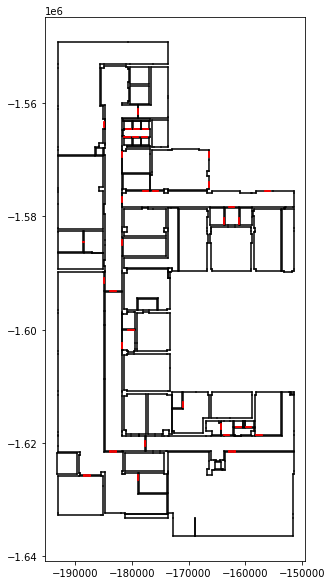

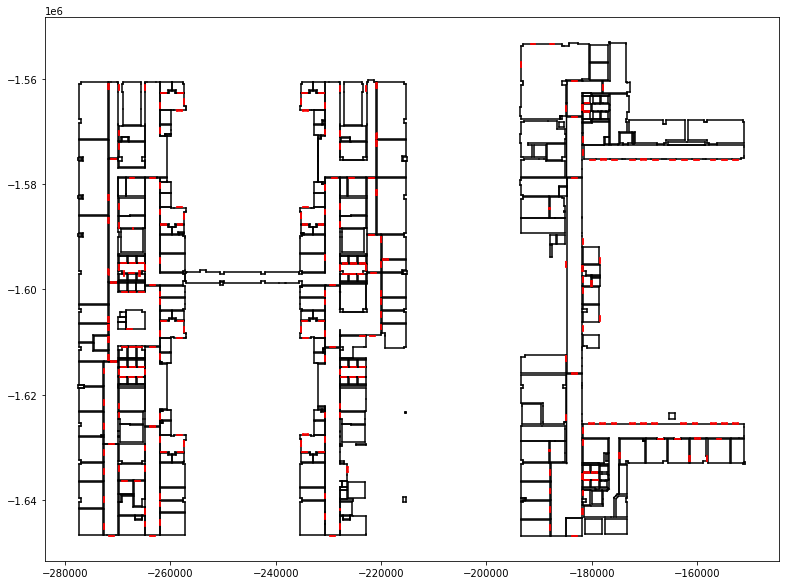

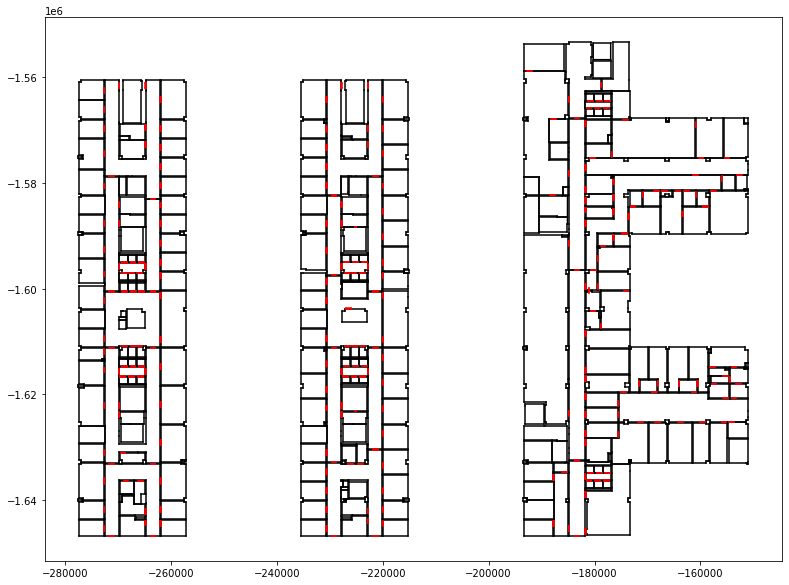

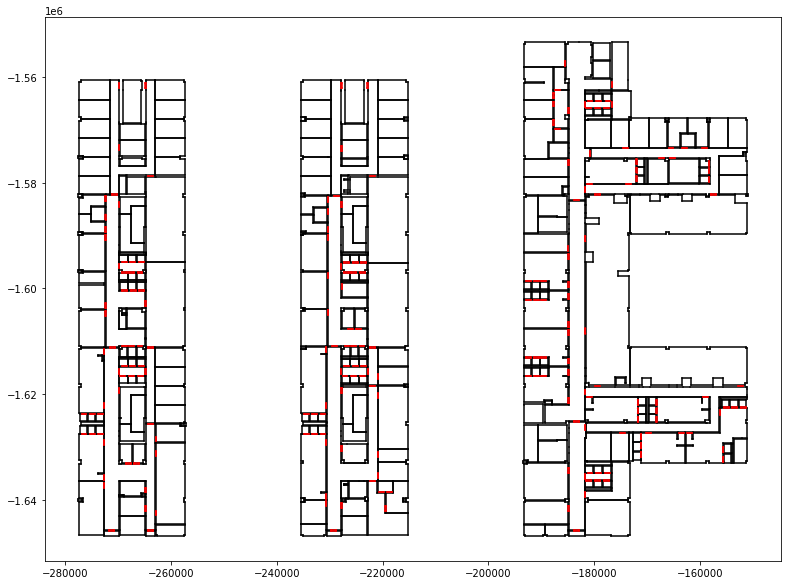

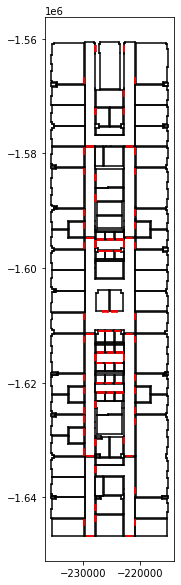

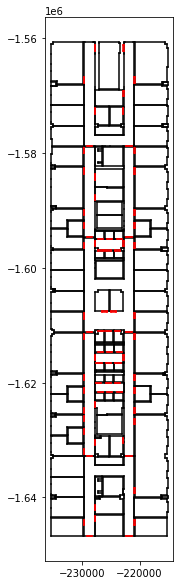

In [23]:
room_levels = ['Kælderplan (99)', 'Stueplan (ST)', 'Plan 1 (01)', 'Plan 2 (02)', 'Plan 3 (03)', 'Plan 4 (04)']
for level in room_levels:
    floor_plan(data_dict2,level)